# BULLKpy - TCGA RNAseq data
@mmm, January 23, 2026

<div style="font-size: 24px; line-height: 1.1; column-count: 2;">
Notebook Menu

<div style="font-size: 18px; line-height: 1.4; column-count: 2;">
<a href="#imports">1. Imports and settings</a><br>
<a href="#loads">2. Load original data into AnnData and BULLKpy object</a><br>
<a href="#pp">3. Quality control and Preprocessing</a><br>
<a href="#pca">4. PCA and Bidimensional Representation</a><br>
<a href="#clusters">5. Clustering and groups</a><br>
<a href="#genes">6. Genes and Gene Signatures</a><br>
<a href="#exploration">7. Data Exploration</a><br>
<a href="#correlations">8. Associations & Correlations</a><br>
<a href="#de">9. Markers and Differential Expression</a><br>
<a href="#go">10. Pathway and Gene Enrichment Analysis</a><br>
<a href="#mp">11. Metaprograms and Tumor Heterogeneity</a><br>
<a href="#plots">12. Additional Plots</a><br>
<a href="#utilities">13. Utilities Data</a><br>

# 1. Imports and settings
<a id="imports"></a>

## 1.1. Modules and Settings

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import anndata as ad
import bullkpy as bk

import gseapy as gspy
from gseapy import Msigdb
from gseapy import gseaplot
from gseapy import enrichment_map

In [2]:
import sys
sys.version
print("Python:", sys.version, "Numpy:", np.__version__, "Pandas:", pd.__version__, "Matplotlib:", mpl.__version__, "Seaborn:", sns.__version__, 
      "AnnData:", ad.__version__, "GSEApy:", gspy.__version__)

Python: 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ] Numpy: 1.23.5 Pandas: 2.3.3 Matplotlib: 3.8.0 Seaborn: 0.11.2 AnnData: 0.10.3 GSEApy: 1.1.0


In [3]:
bk.settings.verbosity = 3
bk.settings.plot_theme = "paper"      # "default" | "paper" | "talk"
bk.settings.plot_palette = "Set1"
bk.settings.plot_fontsize = 10        # optional
bk.settings.plot_dpi = 200
bk.settings.save_dpi = 300

# every plot calls set_style() internally, or you can call once:
bk.pl.set_style()
pal = sns.color_palette("husl", n_colors=35)       # palette for large categories
bk.settings.set_palette_for("Project_ID", where="obs", palette="husl")

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="lifelines")

Change to paths with your files:

In [4]:
TCGA = "/Users/mmalumbres/Desktop/BioDATA/TCGA/"
DESKTOP = "/Users/mmalumbres/Desktop/"

# 2. Load data into AnnData and BULLKpy object
<a id="loads"></a>

Find details and additional parameters for all functions in:  
- https://bullkpy.readthedocs.io/en/latest/api/index.html  

## 2.1. Load expression data

TCGA data is available here:
- https://portal.gdc.cancer.gov/
- https://xenabrowser.net/datapages/

In [56]:
'GDC Pan-Cancer (PANCAN)/RNAseq/GDC-PANCAN.htseq_counts.tsv'
adata = bk.io.read_counts(TCGA + 'GDC Pan-Cancer (PANCAN)/RNAseq/GDC-PANCAN.htseq_counts.tsv', sep='\t', 
                  orientation='genes_by_samples', 
                  #dtype='int64'
                 )

INFO: Reading count matrix from /Users/mmalumbres/Desktop/BioDATA/TCGA/GDC Pan-Cancer (PANCAN)/RNAseq/GDC-PANCAN.htseq_counts.tsv
INFO: Raw matrix shape: (60488, 11057)
INFO: Interpreting rows as genes and columns as samples
INFO: Created AnnData object with 11057 samples ? 60488 genes


In [57]:
adata

AnnData object with n_obs × n_vars = 11057 × 60488

#### Genes

In [58]:
adata.var

""
Ensembl_ID
ENSG00000000003.13
ENSG00000000005.5
ENSG00000000419.11
ENSG00000000457.12
ENSG00000000460.15
...
__no_feature
__ambiguous
__too_low_aQual


if you need to change .e.g from Ensembl IDs to gene symbols:  
- download conversion table from biomart  
- change in adata.var_names

In [59]:
mask = adata.var_names.astype(str).str.startswith("ENS")
adata = adata[:, mask].copy()
adata.var

""
Ensembl_ID
ENSG00000000003.13
ENSG00000000005.5
ENSG00000000419.11
ENSG00000000457.12
ENSG00000000460.15
...
ENSGR0000275287.3
ENSGR0000276543.3
ENSGR0000277120.3


In [60]:
adata.var_names = adata.var_names.str.split(".", n=1).str[0]
adata.var

""
Ensembl_ID
ENSG00000000003
ENSG00000000005
ENSG00000000419
ENSG00000000457
ENSG00000000460
...
ENSGR0000275287
ENSGR0000276543
ENSGR0000277120


In [63]:
biomart_file = "/Users/mmalumbres/Desktop/BioDATA/Ensembl biomart/251224_biomart_export_gene_names.tsv"
gene_names = pd.read_csv(biomart_file, sep="\t")
gene_names.drop_duplicates(subset="Gene stable ID", keep="first", inplace=True)
gene_names = gene_names.set_index("Gene stable ID")
gene_names.head(3)

/var/folders/yw/q_pg1y917pz9nzm99n51ctzh0000gp/T/ipykernel_7363/2707878499.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  gene_names = pd.read_csv(biomart_file, sep="\t")


,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Strand,Gene name,Source of gene name,Transcript name,Source of transcript name,Gene type,Gene Synonym,HGNC symbol,HGNC ID
Gene stable ID,,,,,,,,,,,,,,,
ENSG00000210049,ENSG00000210049.1,ENST00000387314,ENST00000387314.1,MT,577,647,1,MT-TF,HGNC Symbol,MT-TF-201,Transcript name,Mt_tRNA,MTTF,MT-TF,HGNC:7481
ENSG00000211459,ENSG00000211459.2,ENST00000389680,ENST00000389680.2,MT,648,1601,1,MT-RNR1,HGNC Symbol,MT-RNR1-201,Transcript name,Mt_rRNA,12S,MT-RNR1,HGNC:7470
ENSG00000210077,ENSG00000210077.1,ENST00000387342,ENST00000387342.1,MT,1602,1670,1,MT-TV,HGNC Symbol,MT-TV-201,Transcript name,Mt_tRNA,MTTV,MT-TV,HGNC:7500


In [65]:
var_genes = adata.var
var_genes = var_genes.merge(gene_names, how="left", left_index=True, right_index=True)

In [67]:
var_genes = var_genes.set_index("Gene name")
var_genes.head(3)

,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Strand,Source of gene name,Transcript name,Source of transcript name,Gene type,Gene Synonym,HGNC symbol,HGNC ID
Gene name,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003.17,ENST00000373020,ENST00000373020.9,X,100627108.0,100639991.0,-1.0,HGNC Symbol,TSPAN6-201,Transcript name,protein_coding,T245,TSPAN6,HGNC:11858
TNMD,ENSG00000000005.6,ENST00000373031,ENST00000373031.5,X,100584936.0,100599885.0,1.0,HGNC Symbol,TNMD-201,Transcript name,protein_coding,BRICD4,TNMD,HGNC:17757
DPM1,ENSG00000000419.15,ENST00000466152,ENST00000466152.5,20,50934852.0,50959140.0,-1.0,HGNC Symbol,DPM1-205,Transcript name,protein_coding,CDGIE,DPM1,HGNC:3005


In [68]:
adata.var = var_genes
adata.var.head(3)

,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Strand,Source of gene name,Transcript name,Source of transcript name,Gene type,Gene Synonym,HGNC symbol,HGNC ID
Gene name,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003.17,ENST00000373020,ENST00000373020.9,X,100627108.0,100639991.0,-1.0,HGNC Symbol,TSPAN6-201,Transcript name,protein_coding,T245,TSPAN6,HGNC:11858
TNMD,ENSG00000000005.6,ENST00000373031,ENST00000373031.5,X,100584936.0,100599885.0,1.0,HGNC Symbol,TNMD-201,Transcript name,protein_coding,BRICD4,TNMD,HGNC:17757
DPM1,ENSG00000000419.15,ENST00000466152,ENST00000466152.5,20,50934852.0,50959140.0,-1.0,HGNC Symbol,DPM1-205,Transcript name,protein_coding,CDGIE,DPM1,HGNC:3005


In [69]:
adata

AnnData object with n_obs × n_vars = 11057 × 60483
    var: 'Gene stable ID version', 'Transcript stable ID', 'Transcript stable ID version', 'Chromosome/scaffold name', 'Gene start (bp)', 'Gene end (bp)', 'Strand', 'Source of gene name', 'Transcript name', 'Source of transcript name', 'Gene type', 'Gene Synonym', 'HGNC symbol', 'HGNC ID'

In [ ]:
#### Observations (Samples)

Check samples or metadata (if any)

In [7]:
adata.obs

""
TCGA-OR-A5JP-01A
TCGA-OR-A5JG-01A
TCGA-OR-A5K1-01A
TCGA-OR-A5JR-01A
TCGA-OR-A5KU-01A
...
TCGA-WC-A87T-01A
TCGA-WC-AA9A-01A
TCGA-V4-A9EA-01A
TCGA-RZ-AB0B-01A


Check expresion data

In [8]:
adata.X

array([[10,  2, 11, ...,  0,  0, 23],
       [10,  4, 11, ...,  0,  0, 24],
       [10,  1, 11, ...,  0,  0, 23],
       ...,
       [ 9,  0,  6, ...,  0,  0, 23],
       [ 9,  0, 10, ...,  0,  0, 23],
       [ 8,  0,  7, ...,  0,  0, 23]])

You can also use pandas or other python tools to read external data (counts, cpm, log-data etc.).  
See "Other tools" section at the end of the notebook.

## 2.2. Load metadata

Metadata store information relative to observations (Samples); e.g. tumor type; age of the patients, tumor purity, immune infiltration, survival, etc.  
Edit all your available data in an external table (excel, csv, tsv etc.)  
The "index_col" has be be identical to the listing of adata.obs above.

In [87]:
phenotype = '/GDC Pan-Cancer (PANCAN)/phenotype/GDC-PANCAN.TCGA_phenotype.tsv'
all_metadata = "260127_TCGA_metadata.tsv"

In [88]:
# Option 1 for easy metadata tables
adata = bk.add_metadata(adata, 
                        TCGA + all_metadata, 
                        low_memory=False, 
                        sep="\t",
                        index_col="sample",)

INFO: Adding metadata from /Users/mmalumbres/Desktop/BioDATA/TCGA/260127_TCGA_metadata.tsv
/Users/mmalumbres/Library/CloudStorage/OneDrive-VHIO/BioInformatics/BioProjects/MM01_BULLKpy/bullkpy-skeleton/src/bullkpy/io.py:128: DtypeWarning: Columns (32,290,511,556,561,562,565,628,673,705,706,707,708,711,712,715,716,723,724,725,731,771,822,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,939,941,947,948,950,951,952,953,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1

In [89]:
adata.obs.head(3)

,total_counts,n_genes_detected_x,pct_counts_mt,libsize,Sample_ID,Patient_ID,Project_ID,gender,race,ajcc_pathologic_tumor_stage,...,SLIT2_mut,MYC_mut,MYCL_mut,MYCN_mut,SOX2_mut,ASCL1_mut,NEUROD1_mut,POU2F3_mut,YAP1_mut,NE25_score
TCGA-OR-A5JP-01A,134123,15599,0.196089,134123.0,TCGA-OR-A5JP-01,TCGA-OR-A5JP,ACC,MALE,WHITE,Stage II,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
TCGA-OR-A5JG-01A,129774,15534,0.209595,129774.0,TCGA-OR-A5JG-01,TCGA-OR-A5JG,ACC,MALE,WHITE,Stage IV,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
TCGA-OR-A5K1-01A,120282,15187,0.229461,120282.0,TCGA-OR-A5K1-01,TCGA-OR-A5K1,ACC,MALE,WHITE,Stage II,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [12]:
adata

AnnData object with n_obs × n_vars = 11057 × 60488
    obs: 'Sample_ID', 'Patient_ID', 'Project_ID', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'clinical_stage', 'histological_type', 'histological_grade', 'initial_pathologic_dx_year', 'menopause_status', 'birth_days_to', 'vital_status', 'tumor_status', 'last_contact_days_to', 'death_days_to', 'cause_of_death', 'new_tumor_event_type', 'new_tumor_event_site', 'new_tumor_event_site_other', 'new_tumor_event_dx_days_to', 'treatment_outcome_first_course', 'margin_status', 'OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction', 'Subtype_mRNA', 'Subtype_DNAmeth', 'Subtype_protein', 'Subtype_miRNA', 'Subtype_CNA', 'Subtype_Integrative', 'Subtype_other', 'Subtype_Selected', 'sample_type_id', 'sample_type', '_primary_disease', 'Subtype_Immune_Model_Based', 'ICS5_score', 'LIexpression_score', 'Chemokine12_score', 'NHI_5gene_score', 'CD68', 'CD8A', 'PD1_data', 'PDL1_data', 'PD1_PDL1_score', 'CTLA4_data', 'Bcell_

Save AnnData object to your folder

In [17]:
adata.write("../data/h5ad/260127_TCGA_example_in_BULLKpy.h5ad", compression="gzip")

If you find problems writing to .h5ad or with the format of the columns go to the last section (Other Tools) in this notebook

# 3. Quality Control and preprocessing
<a id="pp"></a>

In [ ]:
If you are not sure about the format of the expression data:

In [20]:
# Integer (counts) or log transformed?
print("Are expression data integers: counts?")
X = adata.layers["counts"] if "counts" in adata.layers else adata.X
bk.pp._is_integerish(X)

Are expression data integers: counts?


True

In [90]:
# If counts, Save counts in a separata layer before normalization and log
### SKIP if data are already log-transformed
bk.pp.set_raw_counts(adata)      # layers["counts"]

## 3.1. Compute QC

If counts:  
- `bk.pp.qc_metrics(adata, layer="counts")`  

If log data:  
- `bk.pp.qc_metrics(adata, layer="log1p_cpm", detection_threshold=0.1)`  
will compute only n_genes_detected and warn about skipping count-based metrics

In [24]:
adata.var

""
Ensembl_ID
ENSG00000000003.13
ENSG00000000005.5
ENSG00000000419.11
ENSG00000000457.12
ENSG00000000460.15
...
__no_feature
__ambiguous
__too_low_aQual


In [91]:
bk.pp.qc_metrics(adata, layer="counts", detection_threshold=5,
                mt_prefix='MT-',
                )
# will compute only n_genes_detected and warn about skipping count-based metrics

INFO: QC metrics added to adata.obs (total_counts, n_genes_detected, pct_counts_mt where applicable).


## 3.2. Visual QC overview

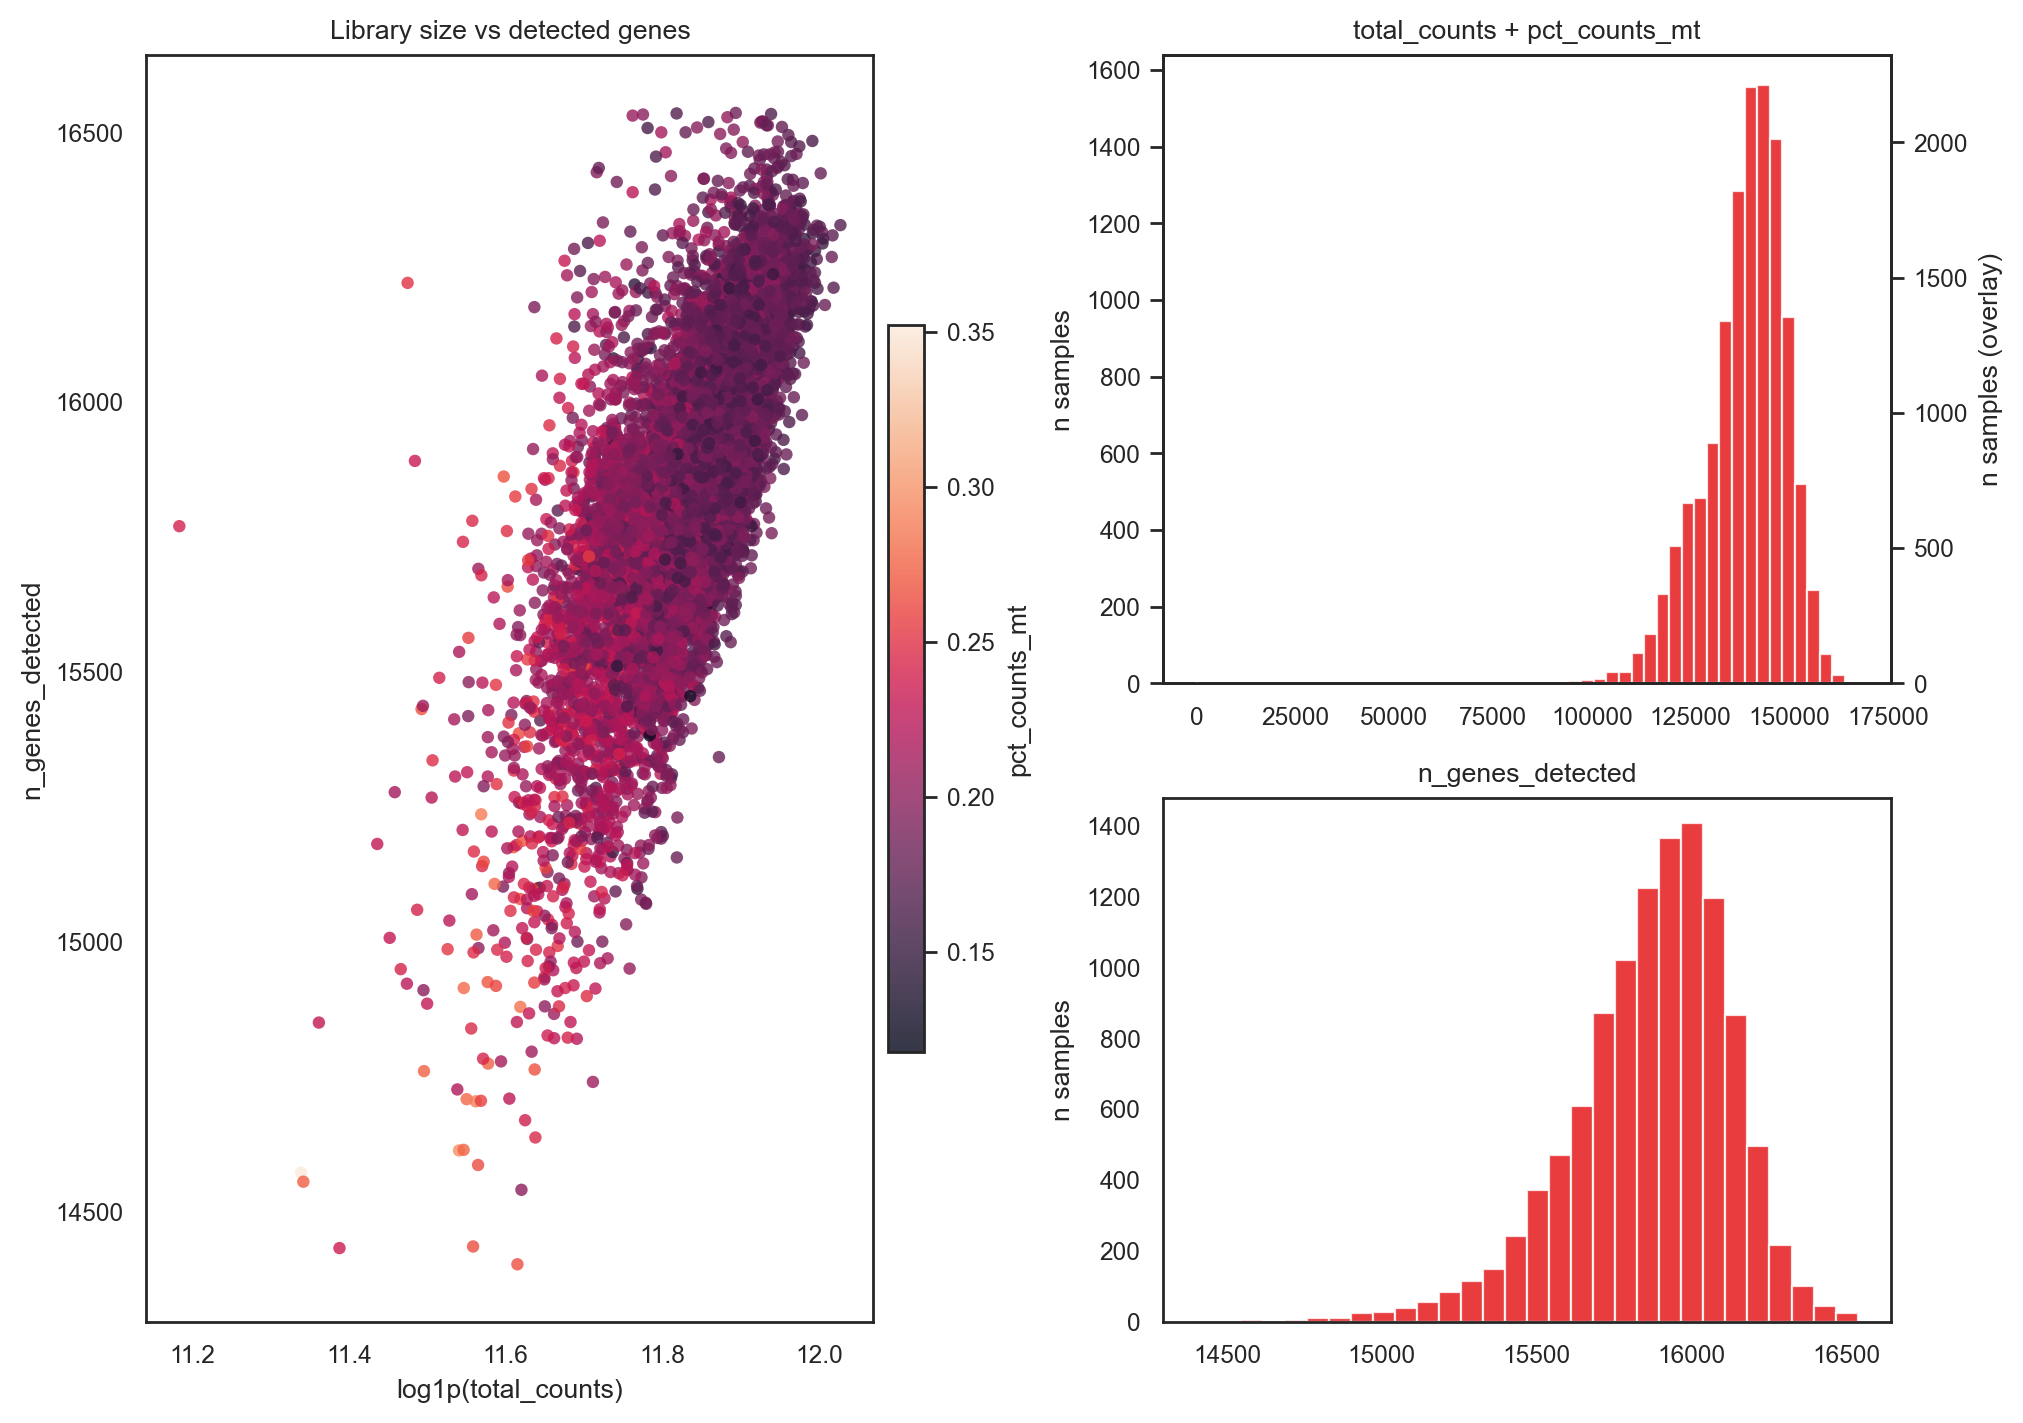

In [92]:
#If you only computed n_genes_detected
bk.pl.qc_metrics(
    adata,
    #color="n_genes_detected",
    #vars_to_plot=("n_genes_detected",)
    save=DESKTOP + "qc_metrics_exaple.png",
);

### Filter out poor quality samples or genes

In [74]:
adata.obs[["n_genes_detected"]].describe()    #"total_counts", "pct_counts_mt"

,n_genes_detected
count,11057.000000
mean,32314.838473
std,3423.261879
min,19943.000000
25%,30246.000000
50%,32087.000000
75%,33983.000000
max,55739.000000


Filter out poor samples or genes
- If counts: use `layer="counts"`
- If normalized, `use layer="cpm"`
- If log-transformed, use `layer="log1p_cpm"`

In [77]:
# keep genes expressed in a minumum of X samples and with expression above a thershol
adata = bk.pp.filter_genes(adata, layer="counts", min_samples=20, min_expr=10)

INFO: Filtering genes: layer='counts', min_expr>10, min_samples=20 -> keep 16539/60483
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [78]:
# keep samples with a minimum of genes detected and minimum expression per gene
adata = bk.pp.filter_samples(adata, layer="counts", min_genes=15000, expr_threshold_for_genes=10)

INFO: Filtering samples -> keep 11057/11057


In [79]:
# 4) Recompute QC after gene filtering (optional but nice)
bk.pp.qc_metrics(adata, layer="counts", detection_threshold=10)

INFO: QC metrics added to adata.obs (total_counts, n_genes_detected, pct_counts_mt where applicable).


### Normalize (skip is already normalized)

In [80]:
bk.pp.normalize_cpm(adata)                  # layers["cpm"]

INFO: Wrote CPM-normalized data to adata.layers['cpm'].


### Log-transform (skip is already normalized and log-transformed)

In [81]:
bk.pp.log1p(adata)                          # layers["log1p_cpm"]

INFO: Wrote log1p-transformed data to adata.layers['log1p_cpm'].


In [16]:
# Open .h5ad file if previously stored
adata = ad.read_h5ad("../data/h5ad/251226_BULLKpy_TCGA_RNAseq.h5ad")

## 3.2. Visual QC overview

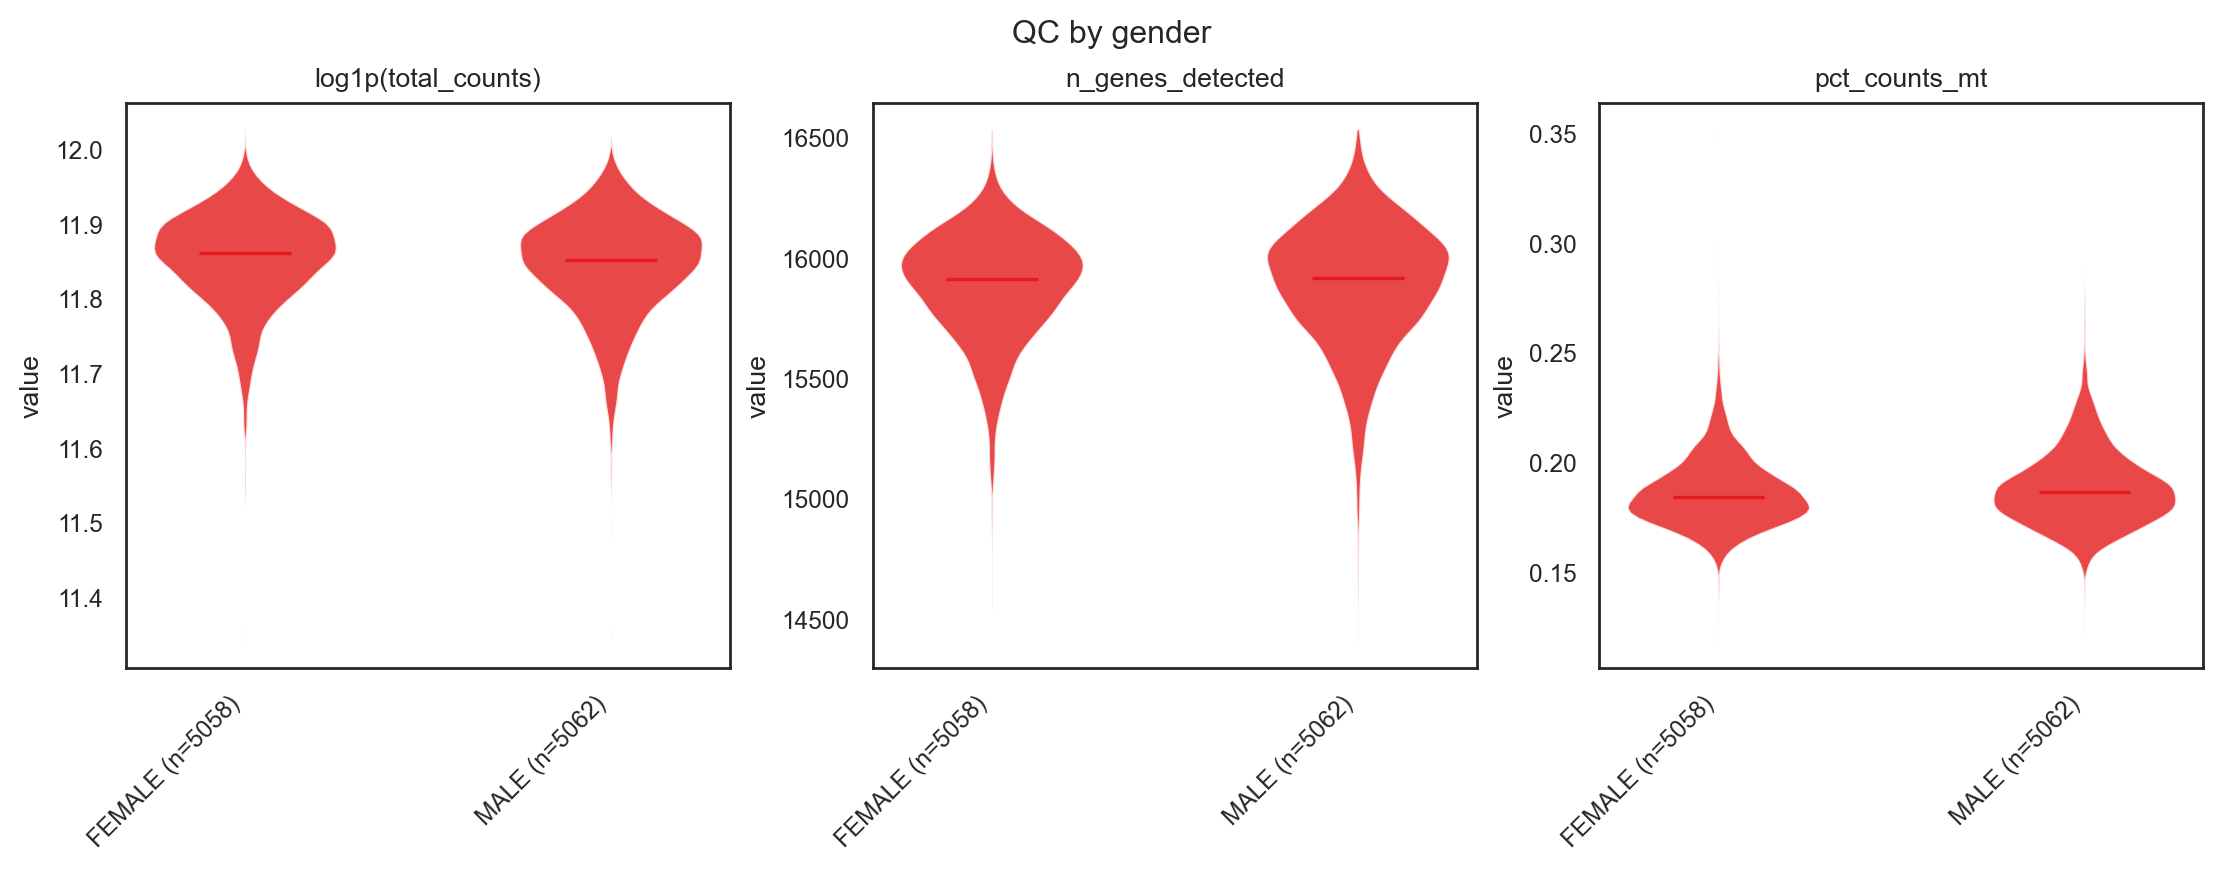

(<Figure size 2200x800 with 3 Axes>,
 array([<Axes: title={'center': 'log1p(total_counts)'}, ylabel='value'>,
        <Axes: title={'center': 'n_genes_detected'}, ylabel='value'>,
        <Axes: title={'center': 'pct_counts_mt'}, ylabel='value'>],
       dtype=object))

In [102]:
bk.pl.qc_by_group(adata, groupby="gender",
                 keys=('total_counts', 'n_genes_detected', 'pct_counts_mt',)
                 )

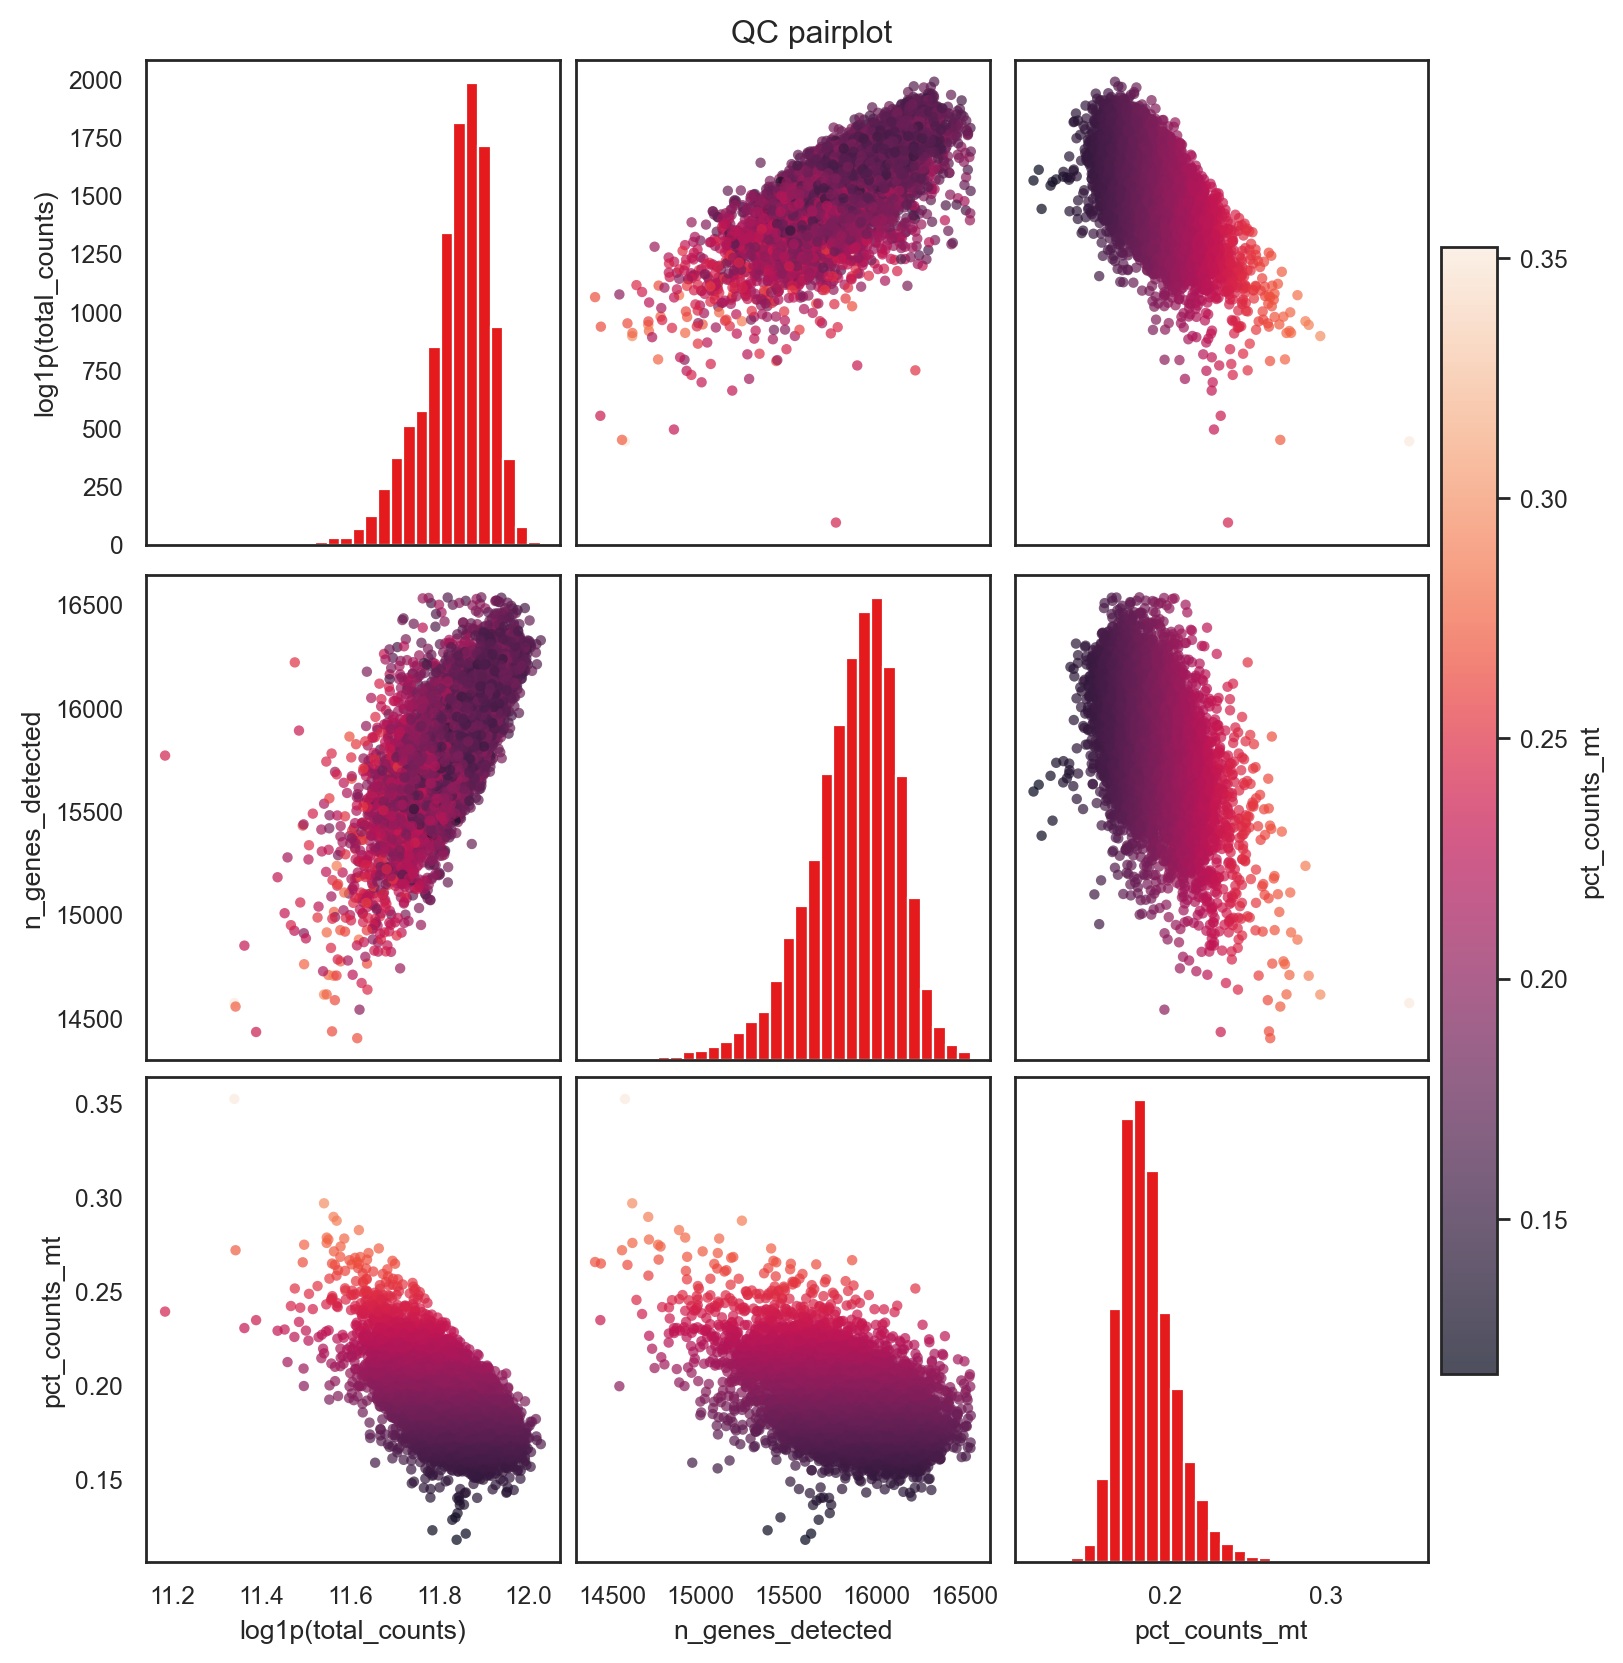

(<Figure size 1600x1600 with 10 Axes>,
 array([[<Axes: ylabel='log1p(total_counts)'>, <Axes: >, <Axes: >],
        [<Axes: ylabel='n_genes_detected'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='log1p(total_counts)', ylabel='pct_counts_mt'>,
         <Axes: xlabel='n_genes_detected'>,
         <Axes: xlabel='pct_counts_mt'>]], dtype=object))

In [104]:
bk.pl.qc_pairplot(adata, keys=('total_counts', 'n_genes_detected', 'pct_counts_mt',))

Store AnnData object with metrics

In [105]:
adata.write("../data/h5ad/260127_TCGA_example_in_BULLKpy.h5ad", compression="gzip")

TypeError: Can't implicitly convert non-string objects to strings

# 4. PCA and bidimensional representation
<a id="pca"></a>

In [25]:
# Chack metadata columns
adata.obs.columns

Index(['Patient_ID', 'Project_ID', 'gender', 'race',
       'ajcc_pathologic_tumor_stage', 'clinical_stage', 'histological_type',
       'histological_grade', 'initial_pathologic_dx_year', 'menopause_status',
       ...
       'MYC_mut', 'MYCL_mut', 'MYCN_mut', 'SOX2_mut', 'ASCL1_mut',
       'NEUROD1_mut', 'POU2F3_mut', 'YAP1_mut', 'NE25_score', 'pct_counts_mt'],
      dtype='object', length=1116)

In [58]:
# IF necessary, ensure data are categories
adata.obs["Project_ID"] = adata.obs["Project_ID"].astype("category")     # or "int" or "float"

<Axes: xlabel='Project_ID'>

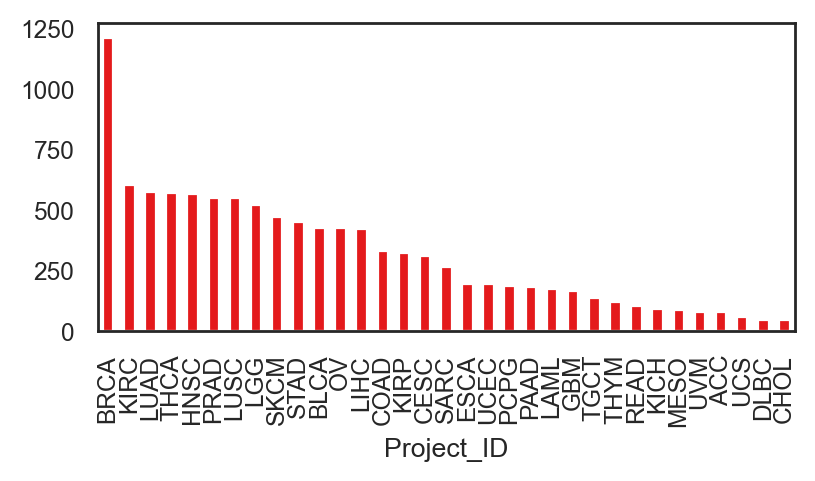

In [22]:
fig, ax = plt.subplots(figsize=(4.5,2), dpi=200)
adata.obs["Project_ID"].value_counts().plot(kind="bar")

## 4.1. Highly-variable genes & PCA

In [27]:
bk.pp.highly_variable_genes(adata, layer="log1p_cpm", n_top_genes=2000)
adata.var["highly_variable"].sum()

INFO: Computing HVGs from layer='log1p_cpm' with n_top_genes=2000
INFO: Marked 2000 highly variable genes in adata.var['highly_variable']


2000

If you ever see HVGs dominated by:
	•	mitochondrial genes
	•	ribosomal genes

you may want to exclude them before HVG selection:

- `mask = ~adata.var_names.str.startswith(("MT-", "RPS", "RPL"))`  
- `adata_hvg = adata[:, mask].copy()`  
- `bk.pp.highly_variable_genes(adata_hvg, ...)`
  


In [28]:
# Compute PCA
bk.tl.pca(adata, layer="log1p_cpm", n_comps=20, 
         use_highly_variable=True,)                              # typically better to use only highly-variable genes

INFO: Running PCA on matrix 10534 samples × 2000 genes; n_comps=20
INFO: PCA stored in adata.obsm['X_pca'], adata.varm['PCs'], adata.uns['pca']


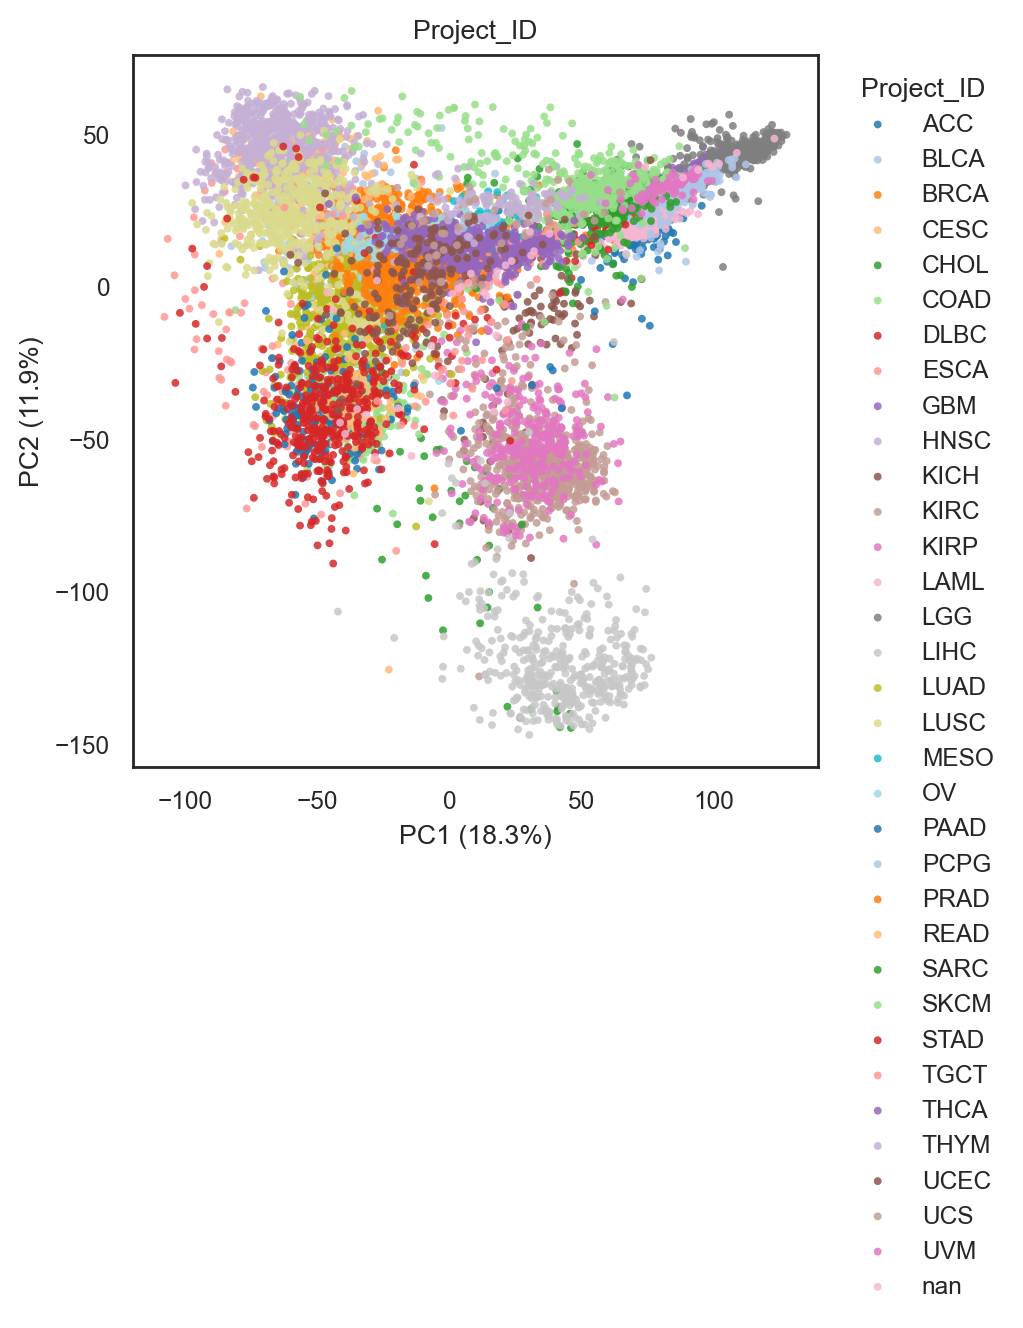

(<Figure size 1000x1200 with 1 Axes>,
 [<Axes: title={'center': 'Project_ID'}, xlabel='PC1 (18.3%)', ylabel='PC2 (11.9%)'>])

In [20]:
bk.pl.pca_scatter(adata, color="Project_ID", palette="tab20", figsize=(5,6), point_size=8)

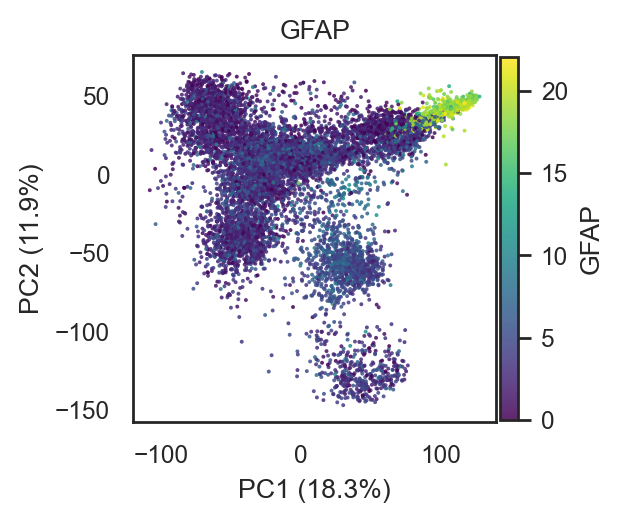

(<Figure size 600x500 with 2 Axes>,
 [<Axes: title={'center': 'GFAP'}, xlabel='PC1 (18.3%)', ylabel='PC2 (11.9%)'>])

In [29]:
bk.pl.pca_scatter(adata, color="GFAP", layer="log1p_cpm", cmap="viridis", point_size=2, figsize=(3,2.5))

# OTHER TOOLS

## Pandas for manipulating expression data and metadata

Set Sample ID as index using pandas and transpose the table

## Sanitize metadata

OPTIONAL.   
It is important that metadata columns are in the proper dtype (categories, numeric, text, etc.) for downstream studies. IF you get problems later with your metadata you can use this utilite below

In [ ]:
bad, _ = bk.pp.find_bad_obs_cols_by_write(adata, n_rows=3000)
print("bad before:", len(bad), bad[:10])
print(" --------------------- ")

adata_safe, rep = bk.pp.make_obs_h5ad_safe_strict(adata, copy=True)
print(rep)
print(" --------------------- ")

bad2, _ = bk.pp.find_bad_obs_cols_by_write(adata_safe, n_rows=3000)
print("bad after:", len(bad2), bad2[:10])

bad before: 65 [('samples.is_ffpe', "Can't implicitly convert non-string objects to strings"), ('days_to_new_tumor_event_after_initial_treatment', "Can't implicitly convert non-string objects to strings"), ('pct_tumor_invasion', "Can't implicitly convert non-string objects to strings"), ('total_pelv_lnp', "Can't implicitly convert non-string objects to strings"), ('total_pelv_lnr', "Can't implicitly convert non-string objects to strings"), ('total_aor_lnr', "Can't implicitly convert non-string objects to strings"), ('neoplasm_length', "Can't implicitly convert non-string objects to strings"), ('days_to_submitted_specimen_dx', "Can't implicitly convert non-string objects to strings"), ('laboratory_procedure_prothrombin_time_result_value', "Can't implicitly convert non-string objects to strings"), ('laboratory_procedure_creatinine_result_lower_limit_of_normal_value', "Can't implicitly convert non-string objects to strings")]
 --------------------- 


/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


{'numeric_coerced': ['samples.is_ffpe', 'days_to_new_tumor_event_after_initial_treatment', 'total_pelv_lnr', 'total_aor_lnr', 'neoplasm_length', 'days_to_submitted_specimen_dx', 'days_to_definitive_surgical_procedure_performed', 'number_of_successful_pregnancies_which_resulted_in_at_least_1_live_birth', 'total_number_of_pregnancies', 'maximum_tumor_dimension', 'days_to_pre_orchi_serum_test', 'pre_orchi_afp', 'pre_orchi_ldh', 'days_to_post_orchi_serum_test', 'tumor_basal_diameter', 'albumin_result_upper_limit', 'albumin_result_lower_limit', 'albumin_result_specified_value', 'platelet_result_upper_limit', 'platelet_result_lower_limit', 'creatinine_lower_level', 'prothrombin_time_result_value', 'ca_19_9_level_upper', 'ca_19_9_level', 'creatinine_upper_limit', 'creatinine_value_in_mg_dl', 'bilirubin_lower_limit', 'total_bilirubin_upper_limit', 'platelet_result_count', 'bilirubin_upper_limit'], 'string_to_object': [], 'stringified': ['pct_tumor_invasion', 'total_pelv_lnp', 'laboratory_proce

re-test if necessary

In [15]:
bad2, _ = bk.pp.find_bad_obs_cols_by_write(adata_safe, n_rows=3000)
print("bad after:", len(bad2), bad2[:10])

bad after: 0 []


If bad = 0

In [16]:
adata = adata_safe.copy()

In [15]:
adata.write("../data/h5ad/260127_TCGA_RNAseq_in_BULLKpy.h5ad", compression="gzip")

In [ ]:
Identify bad columns if necessary

In [13]:
bad = bk.pp.find_bad_obs_cols_by_write(adata, n_rows=800)
bad_cols = [c for c, msg in bad if not c.startswith("<")]
print("Bad columns:", bad_cols)

bk.pp.make_obs_h5ad_safe(adata, columns=bad_cols, fix_index=True)

Bad columns: ['GP1_Proliferation/DNA_repair', 'GP2_Immune-Tcell/Bcell', 'GP4_MES/ECM', 'GP5_MYC_targets/TERT', 'GP6_Squamous_differentiation/development', 'GP8_FOXO/stemness', 'GP11_Immune-IFN_GP12_Hypoxia/glycolosis', 'GP18_Vesicle/EPR_membrane_coat', 'GP20_TAL1-Leukemia/erythropoiesis', 'GP21_Anti-apoptosis/DNA_stability', 'samples.is_ffpe', 'days_to_new_tumor_event_after_initial_treatment', 'total_pelv_lnr', 'total_aor_lnr', 'neoplasm_length', 'days_to_submitted_specimen_dx', 'days_to_definitive_surgical_procedure_performed', 'hematology_serum_creatinine_laboratory_result_value_in_mg_dl', 'laboratory_procedure_total_bilirubin_result_specified_upper_limit_of_normal_value', 'number_of_successful_pregnancies_which_resulted_in_at_least_1_live_birth', 'total_number_of_pregnancies', 'maximum_tumor_dimension', 'days_to_pre_orchi_serum_test', 'post_orchi_ldh', 'pre_orchi_afp', 'pre_orchi_hcg', 'pre_orchi_ldh', 'days_to_post_orchi_serum_test', 'post_orchi_afp', 'histological_percentage', 'mi